In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis
import KNN.common_knn as common_knn
import TrainingCurves

import numpy as np
from sklearn import neighbors

In [2]:
GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_KNN"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "K Nearest Neighbors"
DATASET = "Faces"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

In [3]:
# Load Data
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]

In [4]:
# Start with Learning Curve on Default Classifier
default_train_sizes, default_train_scores, default_test_scores, default_fit_times, default_score_times\
= TrainingCurves.perform_learning_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "accuracy")

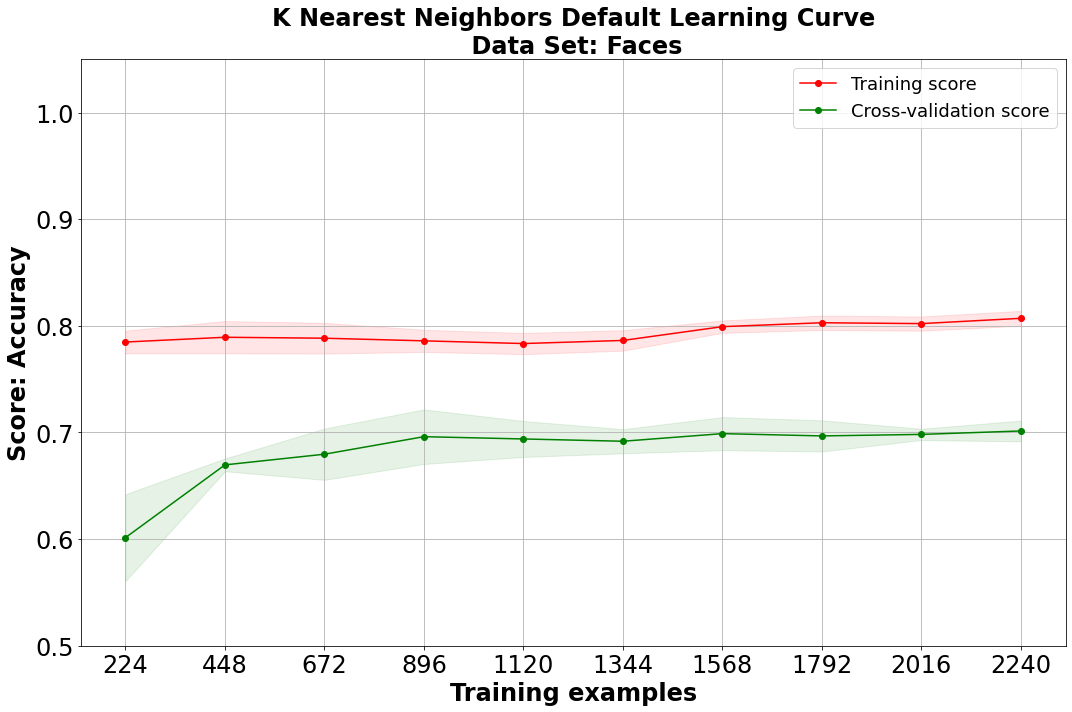

In [5]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(default_train_scores, default_test_scores, default_train_sizes, default_title, ylim=ylim)

In [6]:
n_neighbors = [i for i in range(1, 80)]
weights = ['uniform', 'distance']
p = [1, 2]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [i for i in range(100)]

In [7]:
parameters = {'n_neighbors': n_neighbors, 'weights': weights, 'p': p}

gs = common_knn.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX= GS_FILE_NAME_PREFIX)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/FACES_KNN_n_neighbors_1-79_weights_uniform-distance_p_1-2.pickle
Fitting 5 folds for each of 316 candidates, totalling 1580 fits
Saved  Analysis_Data/FACES_KNN_n_neighbors_1-79_weights_uniform-distance_p_1-2.pickle


Plot saved as:  Figures/Faces_K Nearest Neighbors_GS_ModelComplexity_n_neighbors_p_weights.png


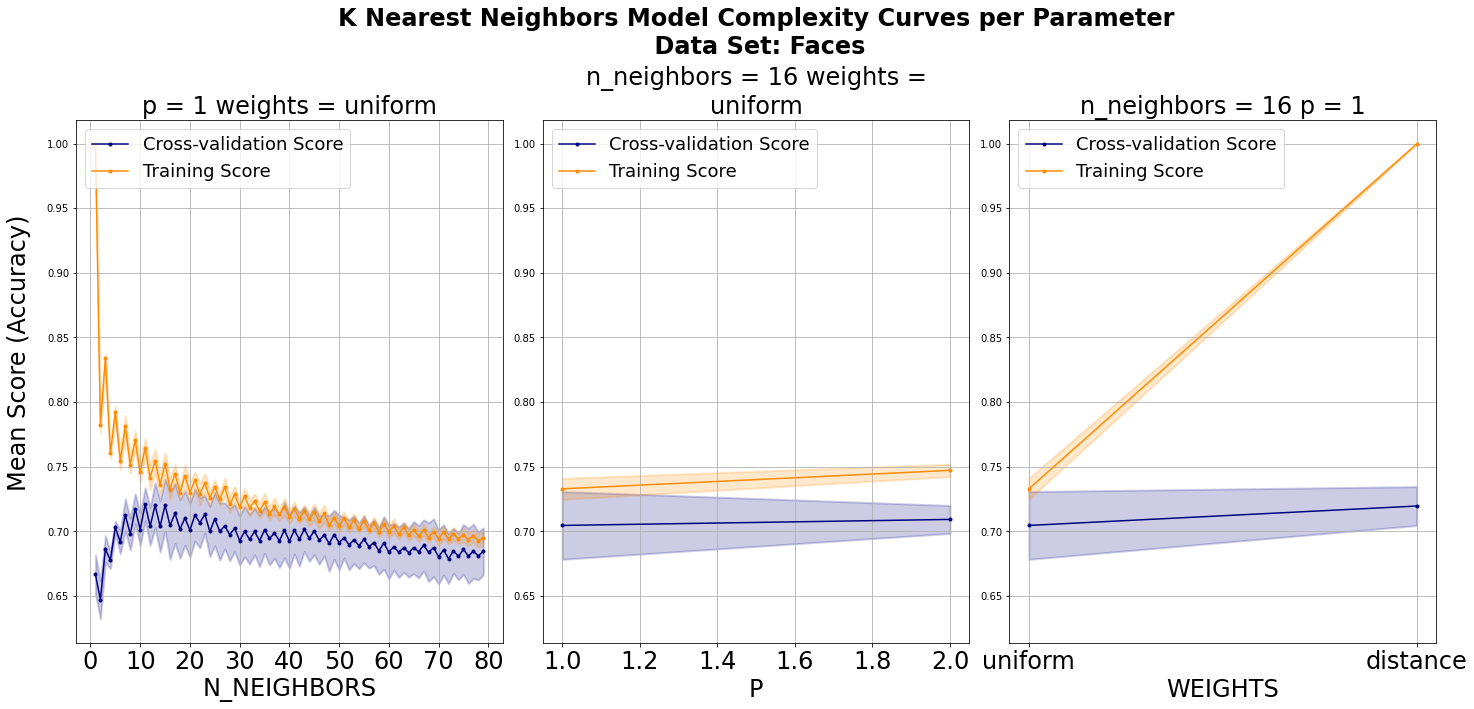

Plot saved as:  Figures/Faces_K Nearest Neighbors_GS_Times_n_neighbors_p_weights.png


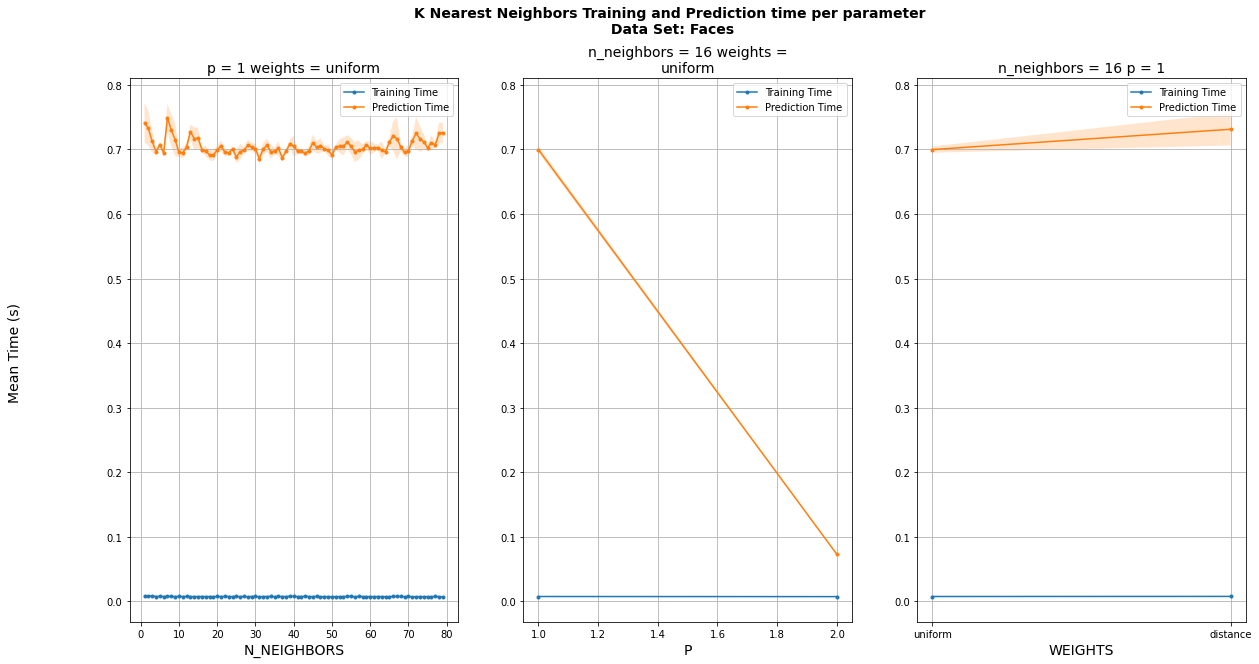

In [9]:
unused_params_value_dict = {'p': 1, 'weights': 'uniform'}
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_value_dict)
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_value_dict)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 790 out of 790 | elapsed:   31.1s finished


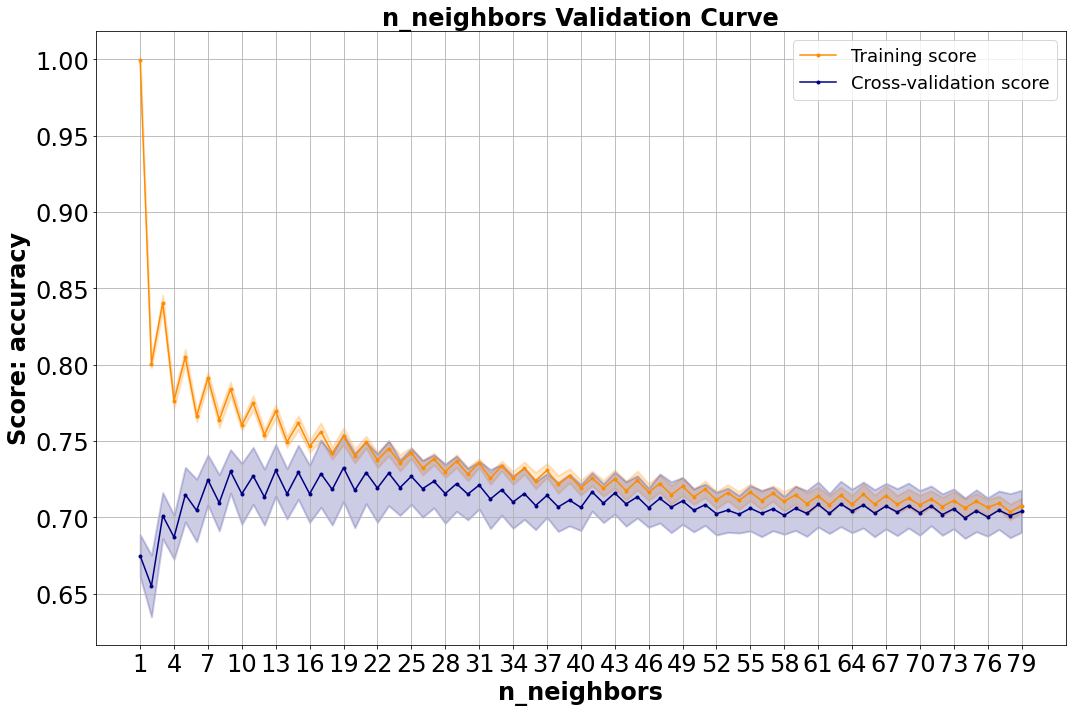

In [13]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "n_neighbors", n_neighbors, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_neighbors", n_neighbors, title="n_neighbors Validation Curve", scoring="accuracy", tick_spacing=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.0min finished


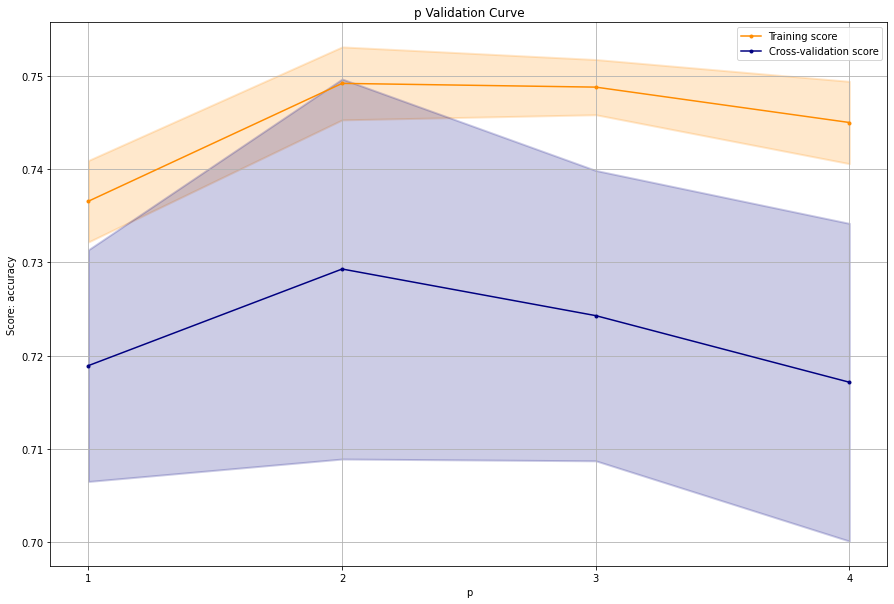

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


KeyboardInterrupt: 

In [13]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(n_neighbors=21), X_train, y_train, "p", p, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "p", p, title="p Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(p=1), X_train, y_train, "n_neighbors", n_neighbors, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_neighbors", n_neighbors, title="n_neighbors Validation Curve", scoring="accuracy", tick_spacing=2)


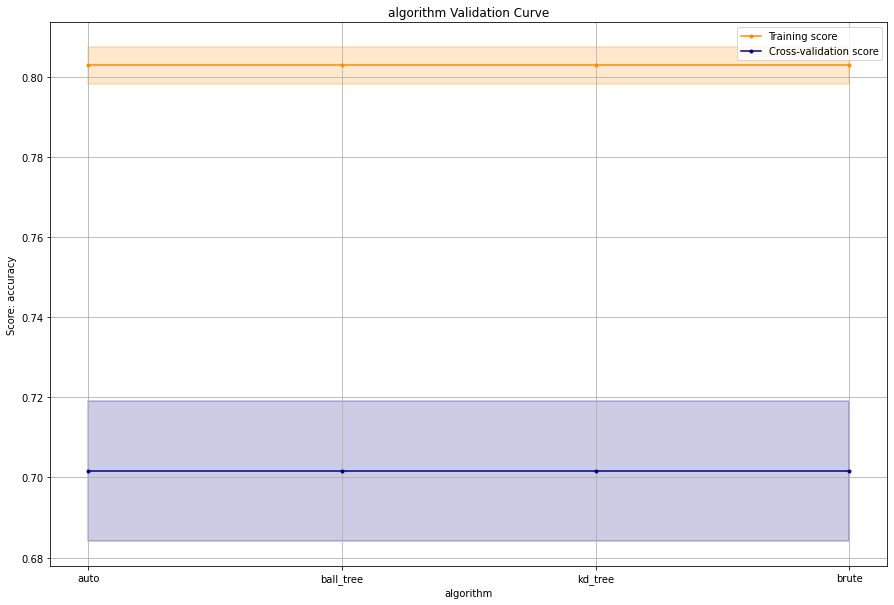

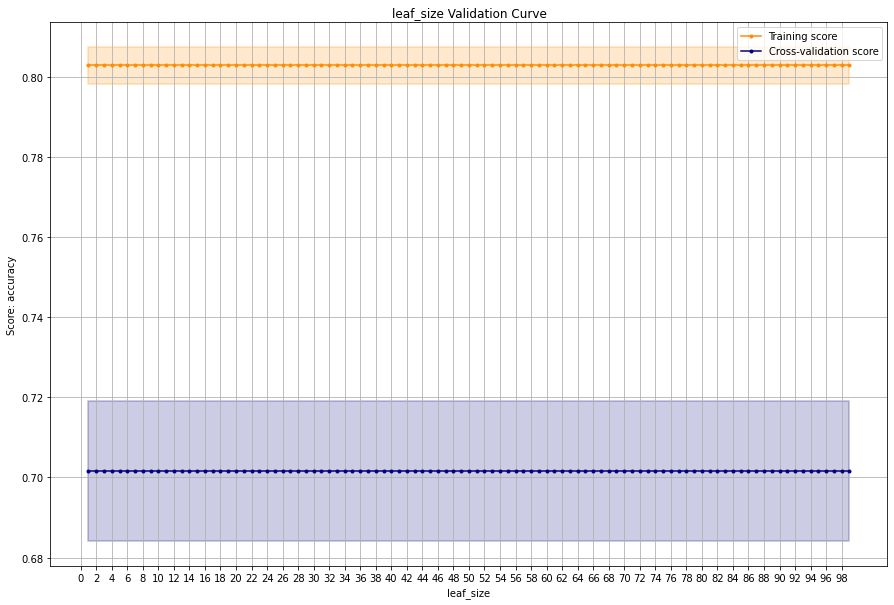

In [9]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "algorithm", algorithm, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "algorithm", algorithm, title="algorithm Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(algorithm='ball_tree'), X_train, y_train, "leaf_size", leaf_size, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "leaf_size", leaf_size, title="leaf_size Validation Curve", scoring="accuracy", tick_spacing=2)

In [11]:
params = {"n_neighbors": 35, "p":2}
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times, score_times = TrainingCurves.perform_learning_curve(neighbors.KNeighborsClassifier(**params), X_train, y_train, "accuracy")

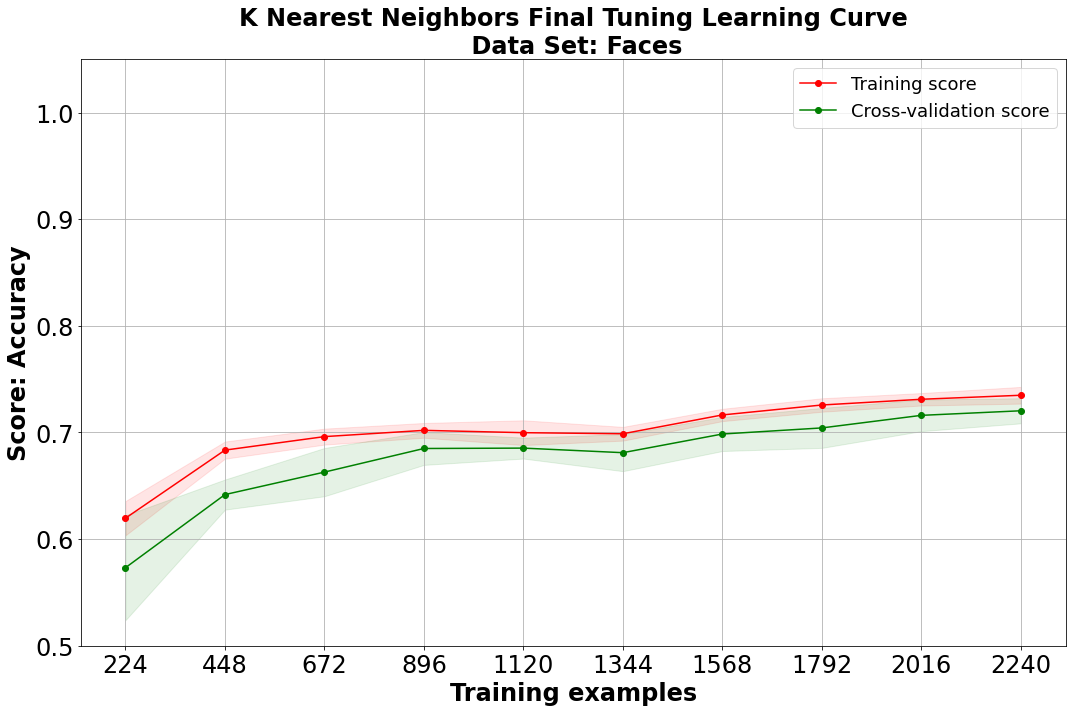

In [12]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=ylim)